# Proyecto Final Algebra Lineal 2017
---

El proyecto del curso consiste en la implementación del [Algortimo de Canny](https://es.wikipedia.org/wiki/Algoritmo_de_Canny) para la detección de bordes en imágenes y videos. Para ello, se le entrega al estudiante toda la implementación del algoritmo en [OpenCV](http://opencv.org/) y su objetivo es **implementar las funciones de OpenCV con matrices**. 

Las funciones a modificar serán las siguientes:
```python
cv2.GaussianBlur()
cv2.Sobel()
```

No es necesario que modifique más del código que se le solicita, pero puede hacer las modificaciones pertinentes si ese fuera el caso. Dentro del código se le indica en qué parte debe de ser modificado, por ejemplo:

```python
'''Modificar esta función'''
    sobel = cv2.Sobel(img, cv2.CV_64F, x, y, ksize=sobel_kernel)
``` 

Se recomienda buscar maneras de optimizar los cálculos de sus filtros, pues más adelante existe una aplicación en tiempo real donde es crucial que sus cálculos sean lo más rápidos posibles. Las dimensiones de los *kernels* no pueden ser modificadas.

## 0. Conceptos
Para poder modificar las funciones solicitadas es necesario que comprenda algunos conceptos, por lo cual es necesario que defina:

1.¿En que consiste la convolución y cómo puede ser calculada? (Puede dar una definición matemática y/o ejemplos).

Es una función que de forma lineal y continua transforma una señal de entrada en una nueva de salida. Filtro de propósito general aplicado a imágenes. 

En filtros de imágenes, una convolución es el tratamiento de una matriz por otra llamada “kernel”. Puede ser calculada al multiplicar uno a uno la matriz por el kernel, el resultado va generando una nueva matriz, como el siguiente ejemplo: 

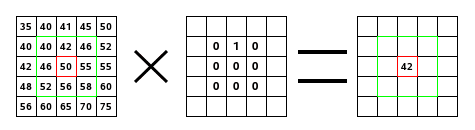

(40*0)+(42*1)+(46*0) + (46*0)+(50*0)+(55*0) + (52*0)+(56*0)+(58*0) = 42

2.¿Qué es el *kernel* de un filtro y para que se utiliza?

También se le llama núcleo de la convolución. El kernel es una matriz de números los cuales son los pesos por los que debe multiplicarse la intensidad del entorno de cada punto, en este caso pixeles.  Se utiliza para dar el filtro deseado a la imagen. 

3.¿En qué consiste un filtro Gaussiano?

Este filtro da más peso al centro y menos a los bordes, por lo que produce un desenfoque. Este filtro actúa sobre cada pixel estableciendo un nuevo valor como el promedio de todos los valores de los pixeles incluidos en un radio definido. 

4.¿En qué consiste el Filtro Sobel? ¿para qué sirve?

El filtro Sobel consiste en detectar los bordes horizontales y verticales separadamente sobre una imagen en escala de grises. Este filtro sirve para resaltar aquellas partes de la imagen que no se ven a simple vista, ya sea verticales y horizontales, realzando las fronteras de la imagen. 

5.Describa el algoritmo de detección de bordes Canny.

El algoritmo de Canny tiene relación con la primera derivada. Uno de los métodos relacionados con la detección de bordes es el uso de la primera derivada, porque toma el valor cero en las regiones donde la intensidad no varía, y un valor constante en donde hay intensidad. 

El algoritmo de Canny consiste en tres pasos: 

Obtención del gradiente: Se calcula la magnitud y orientación del vector gradiente en cada píxel. Se aplica un filtro gaussiano a la imagen original para suavizarla y eliminar el posible ruido. No se debe realizar un suavizado excesivo porque se pueden perder detalles importantes de la imagen.

Supresión no máxima: Se adelgazan los bordes para lograr que sean del tamaño de un píxel. 

Eliminar ruido y cerrar los contornos abiertos. 


In [1]:
import numpy as np
import matplotlib.pylab as plt
import cv2
import time

from moviepy.editor import VideoFileClip
from IPython.display import HTML

%matplotlib inline

In [2]:
def gaussian_blur(imgMatrix, kernel = 5): 

    #Obtain dimensions (.shape Out = (rows, columns))
    m, n = imgMatrix.shape
    
    #newMatrix will have the same dimensions as the original one. 
    newMatrix = np.zeros((m, n))
    newMatrix = imgMatrix
    
    imgMatrix = imgMatrix.astype(np.float)
  
    for j in range(2, n-2): 
        for i in range(2, m-2):
            #Kernel's values.
            #Kernel's values will be multiply for some positions of the pixeles matrix. 
            newMatrix[i,j] = (0.150342*imgMatrix[i,j]) + (0.003765*(imgMatrix[i-2,j-2]+imgMatrix[i+2,j-2]+imgMatrix[i-2,j+2]+imgMatrix[i+2,j+2])) + (0.015019*(imgMatrix[i-2,j-1]+imgMatrix[i-1,j-2]+imgMatrix[i+1,j-2]+imgMatrix[i-1,j+2]+imgMatrix[i+1,j+2]+imgMatrix[i+2,j-1]+imgMatrix[i+2,j+1]+imgMatrix[i-2,j+1])) + (0.023792*(imgMatrix[i,j-2]+imgMatrix[i,j+2]+imgMatrix[i+2,j]+imgMatrix[i-2,j])) + (0.059912*(imgMatrix[i-1,j-1]+imgMatrix[i-1,j+1]+imgMatrix[i+1,j-1]+imgMatrix[i+1,j+1])) +(0.094907*(imgMatrix[i-1,j]+imgMatrix[i,j-1]+imgMatrix[i+1,j]+imgMatrix[i,j+1]))    
    
    return newMatrix

In [3]:
def sobel_filter(imgMatrix, x, y, sobel_kernel = 3):
    
    #Obtains matrix dimensions.
    m, n = imgMatrix.shape
    #newMatriz will contain only zeros.
    newMatrix = np.zeros((m, n))
    
    imgMatrix = imgMatrix.astype(np.float) 
    
    if x == 0:
        #when y = 1.
        for j in range(2,n-2): 
            for i in range(2,m-2):
                #Kernel's values.
                newMatrix[i,j] = (imgMatrix[i-1,j-1] + imgMatrix[i-1,j+1] + 2*imgMatrix[i-1,j] - imgMatrix[i+1,j-1] - imgMatrix[i+1,j+1] - 2*imgMatrix[i+1,j])             
    if x == 1:
        for j in range(2,n-2): 
            for i in range(2,m-2):
                #Kernel's values.
                newMatrix[i,j] = (2*imgMatrix[i,j+1] + imgMatrix[i+1,j+1] + imgMatrix[i-1,j+1] - 2*imgMatrix[i,j-1] - imgMatrix[i-1,j-1] - imgMatrix[i+1,j-1])
        
    return newMatrix

In [4]:
#def gaussian_blur(img, kernel = 5):

    #'''Modificar esta función'''
#   return cv2.GaussianBlur(img,(kernel,kernel),0)

#def sobel_filter (img, x, y, sobel_kernel= 3):


   # '''Modificar esta función'''
 #   return cv2.Sobel(img, cv2.CV_64F, x, y,sobel_kernel)

#global to use it in the next block.
global SobelX, SobelY

#In order to send values.
def XYvalues(img, sobel_kernel = 3):
    global SobelX, SobelY
    #for x
    SobelX = sobel_filter(img, 1, 0, sobel_kernel)
    #for y
    SobelY = sobel_filter(img, 0, 1, sobel_kernel)

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    if orient == 'x':
        x,y = 1,0
        sobel = SobelX
    elif orient == 'y':
        x,y = 0,1
        sobel = SobelY
        
    #'''Modificar esta función'''
    #sobel = sobel_filter(img, x, y, sobel_kernel)
    
    # Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)

    # Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a mask of 1's where the scaled gradient magnitude 
    # is > thresh_min and < thresh_max
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
  #  print 'abs_sobel_thresh done'
    return sbinary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Take the gradient in x and y separately
    '''Modificar esta función'''
    #sobelx = sobel_filter(image, 1, 0, sobel_kernel)
    sobelx = SobelX
    '''Modificar esta función'''
    #sobely = sobel_filter(image, 0, 1, sobel_kernel)
    #Because Sobel Y is already this: SobelY = sobel_filter(img, 0, 1, sobel_kernel)
    sobely = SobelY
    
    # Calculate the magnitude 
    abs_sobel = np.sqrt(sobelx**2 +sobely**2)

    # Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a binary mask where mag thresholds are met
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return sbinary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Take the gradient in x and y separately
    '''Modificar esta función'''
    #sobelx = sobel_filter(image, 1, 0, sobel_kernel)
    sobelx = SobelX
    '''Modificar esta función'''
    #sobely = sobel_filter(image, 0, 1, sobel_kernel)
    sobely = SobelY
    
    # Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)   
    abs_sobely = np.absolute(sobely)
    
    # Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grad_dir = np.arctan2(abs_sobely, abs_sobelx)
    
    # Create a binary mask where direction thresholds are met
    sbinary = np.zeros_like(grad_dir)
    sbinary[(grad_dir >= thresh[0]) & (grad_dir <= thresh[1])] = 1
    return sbinary

## 1. Prueba en Imagen

In [5]:
# Test filter on single image:
im = plt.imread("BTD.jpg")
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

#TIME
start = time.time()

# Gaussian Blur Filtering
gray = gaussian_blur(gray, kernel = 5)

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
XYvalues(gray)
gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(50, 100))
grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(50, 100))
mag_binary = mag_thresh(gray, sobel_kernel=ksize, mag_thresh=(20, 100))
dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(0, np.pi/2))

# Create combined image with sobel filters applied
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

rgb_combined = np.asarray(np.dstack((combined, combined, combined)), dtype=np.float64)

m, s = divmod(time.time()-start, 60)
h, m = divmod(m, 60)
print "%d:%02d:%02d" % (h, m, s)

0:03:44


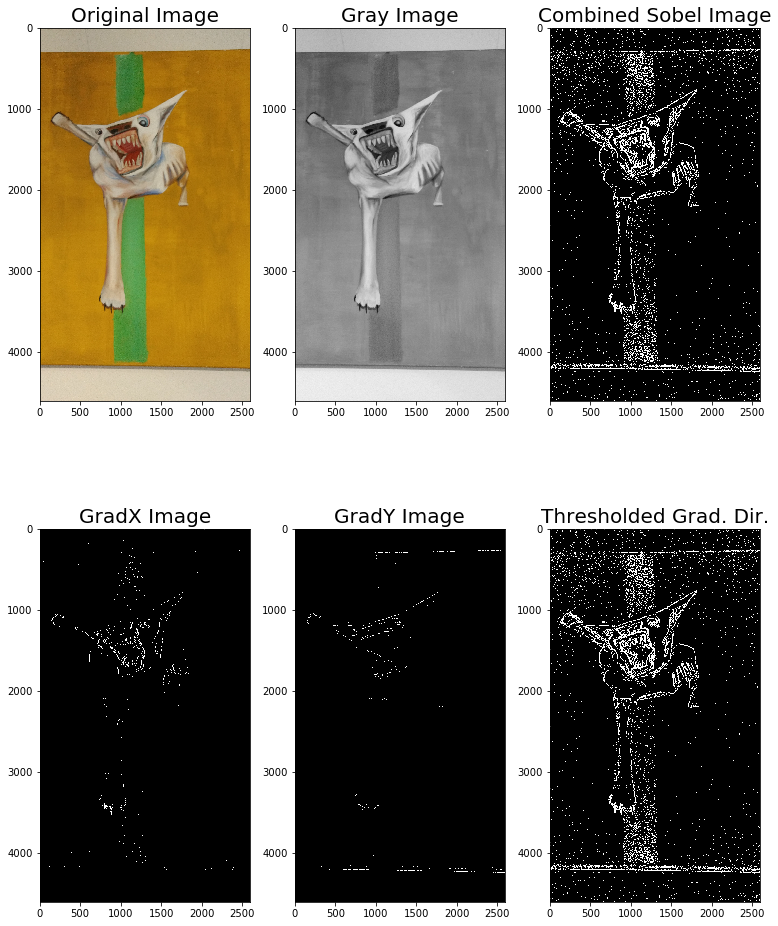

0:00:08


In [7]:
#TIME
start = time.time()

# Plot the result
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10, 15))
f.tight_layout()
ax1.imshow(im)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(gray, cmap='gray')
ax2.set_title('Gray Image', fontsize=20)
ax3.imshow(rgb_combined, cmap='gray')
ax3.set_title('Combined Sobel Image', fontsize=20)
ax4.imshow(gradx, cmap='gray')
ax4.set_title('GradX Image', fontsize=20)
ax5.imshow(grady, cmap='gray')
ax5.set_title('GradY Image', fontsize=20)
ax6.imshow(((mag_binary == 1) & (dir_binary == 1)), cmap='gray')
ax6.set_title('Thresholded Grad. Dir.', fontsize=20)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

m, s = divmod(time.time()-start, 60)
h, m = divmod(m, 60)
print "%d:%02d:%02d" % (h, m, s)

## 2. Prueba en Videos

In [13]:
def process_image(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = gaussian_blur(gray, kernel = 5)
    # Choose a Sobel kernel size
    ksize = 3 # Choose a larger odd number to smooth gradient measurements

    # Apply each of the thresholding functions
    XYvalues(gray)
    gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(50, 100))
    grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(50, 100))
    mag_binary = mag_thresh(gray, sobel_kernel=ksize, mag_thresh=(20, 100))
    dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(0, np.pi/4))
    
    combined = np.zeros_like(dir_binary)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    
    rgb_combined = np.asarray(np.dstack((combined, combined, combined)), dtype=np.uint8)
    
    retval, threshold = cv2.threshold(rgb_combined, 0, 255, cv2.THRESH_BINARY)
    
    return threshold

In [14]:
filter_output = 'Cat_Filter.mp4'
clip1 = VideoFileClip("Cat.mp4")
batman_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time batman_clip.write_videofile(filter_output, audio=False)

[MoviePy] >>>> Building video Cat_Filter.mp4
[MoviePy] Writing video Cat_Filter.mp4


[MoviePy] Done.
[MoviePy] >>>> Video ready: Cat_Filter.mp4 

Wall time: 2min 2s


In [15]:
HTML("""
<video width="720" height="480" controls>
  <source src="{0}">
</video>
""".format(filter_output))

In [16]:
cap = cv2.VideoCapture(0)  # 0 for Python 3, 1 for Python 2. No idea why?!!

fourcc = cv2.cv.CV_FOURCC(*"MJPG")

#out = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*"MJPG"), 20,(640,480))
out = cv2.VideoWriter("output.avi", fourcc, 20, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,180)
        new_frame = process_image(frame)
        out.write(new_frame)

        cv2.imshow('frame',new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()